In [2]:
import mrcfile

In [9]:
name = "TS_0001"

In [ ]:
s = mrcfile.read(f"/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/tomograms/{name}_trimmed.rec")
g = mrcfile.read(f"/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/labels/{name}_membranes_trimmed.mrc")

In [ ]:
assert s.shape[0] == g.shape[0] and s.shape[1] == g.shape[1] and s.shape[2] == g.shape[2]

AssertionError: 

In [16]:
g.shape

(200, 927, 927)

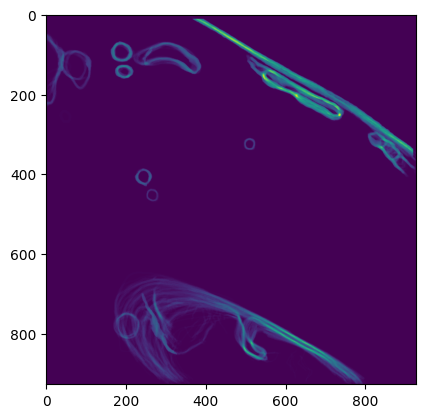

In [18]:
import matplotlib.pyplot as plt
plt.imshow(g.sum(axis=0))

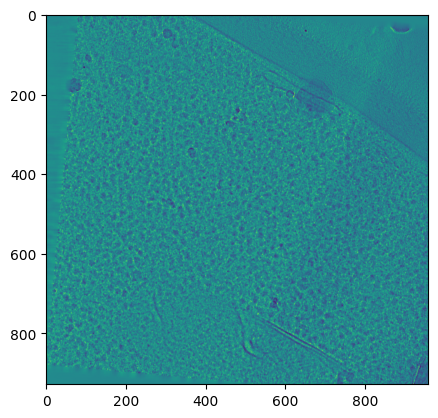

In [19]:
plt.imshow(s.sum(axis=0))

In [10]:
from datasets import build_dataset
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

with initialize(version_base=None, config_path="configs/"):
    cfg = compose(config_name='config.yaml')

print(cfg)
OmegaConf.set_struct(cfg, False)
cfg = OmegaConf.merge(cfg, cfg.method)


{'exp_name': 'try', 'ckpt_path': None, 'seed': 42, 'debug': False, 'devices': [3], 'load_num_workers': 63, 'train_data_path': ['/path/to/train'], 'val_data_path': ['/path/to/val'], 'cache_path': './cache', 'max_data_num': [None], 'use_cache': False, 'overwrite_cache': False, 'store_data_in_memory': False, 'tomo_list': './configs/tomo_list.csv', 'log_every_n_steps': 1, 'method': {'model_name': 'deepict_unet3d', 'train_batch_size': 5, 'eval_batch_size': 5, 'dataset': 'memseg', 'depth': 2, 'initial_features': 4, 'encoder_dropout': 0.0, 'decoder_dropout': 0.2, 'BN': True, 'elu': False, 'learning_rate': 0.002, 'max_epochs': 100, 'grad_clip_norm': None, 'img_folder': '/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/tomograms', 'label_folder': '/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/labels', 'aug_prob_to_one': False, 'patch_size': 64, 'on_the_fly_loading': True}}


In [11]:
ds = build_dataset(cfg, val=False)

In [16]:
import torch
for batch in ds:
    print(type(batch["image"]))
    print(torch.Tensor(batch["image"]).shape)
    img = torch.Tensor(batch["image"])
    lab = torch.Tensor(batch["label"])
    break

<class 'monai.data.meta_tensor.MetaTensor'>
torch.Size([1, 64, 64, 64])


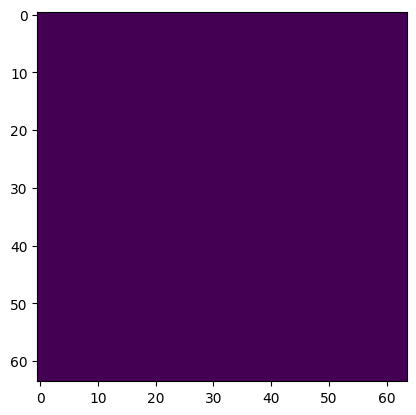

In [21]:
import matplotlib.pyplot as plt

plt.imshow(lab[0].sum(axis=0))

In [3]:
import mrcfile
g = mrcfile.read(f"/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/labels/TS_0001_membranes_trimmedX.mrc")

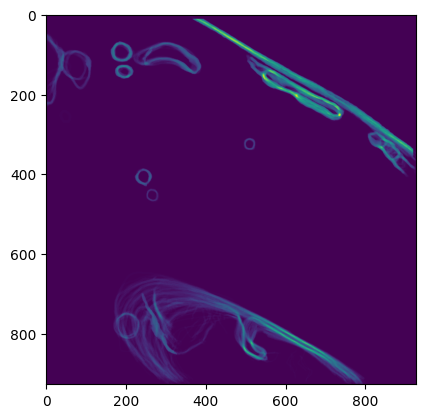

In [4]:
import matplotlib.pyplot as plt
plt.imshow(g.sum(axis=0))

In [5]:
import numpy as np

g_rot = np.rot90(g, k=1, axes=(1,2))

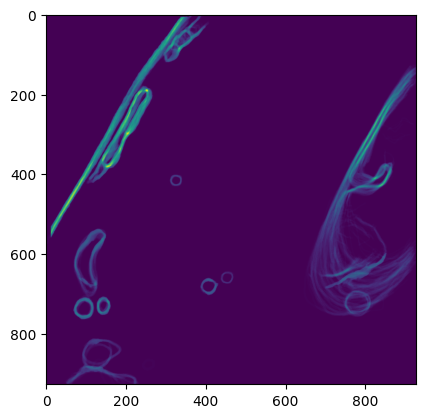

In [6]:
plt.imshow(g_rot.sum(axis=0))